In [1]:
import pickle
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")
import sklearn.metrics as metrics

In [6]:
def ROC_plot(y_probas,labels,name = 'loss_acc_roc/roc-chexpert.svg',save=False):
    for c in range(5):
        fpr = []
        tpr = []
        thresholds = np.arange(0.0, 1.01, .01)

        P = list(labels).count(c)
        N = len(labels) - P

        for thresh in thresholds:
            FP=0
            TP=0
            for i in range(len(labels)):
                if (y_probas[i][c] > thresh):
                    if labels[i] == c:
                        TP = TP + 1
                    else:
                        FP = FP + 1
            fpr.append(FP/float(N))
            tpr.append(TP/float(P))
            
        auc = np.trapz(tpr,fpr)
        print('\tclass',c,'auc',auc)
        plt.plot(fpr, tpr, label = 'Class: {}, auc:{:.3f}'.format(c,auc))
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    if save:
        plt.savefig(name, format = 'svg')
    plt.show()
    plt.clf()

dict_keys(['preds', 'labels'])
	class 0 auc -0.853369577666382
	class 1 auc -0.6618474386496114
	class 2 auc -0.7029089711355013
	class 3 auc -0.5497212758412594
	class 4 auc -0.8001852240019804


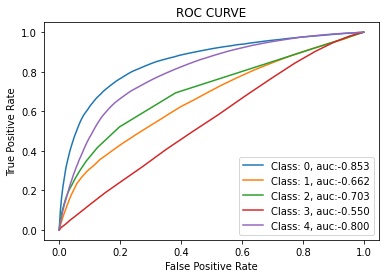

<Figure size 432x288 with 0 Axes>

In [7]:
# ExLNet
with open('roc_pickle_files/exlnet.pkl', 'rb') as f:
    x = pickle.load(f)
    print(x.keys())
    ROC_plot(x['preds'],x['labels'])

	class 0 auc -0.7697215844824071
	class 1 auc -0.6095954714304279
	class 2 auc -0.6053612395854115
	class 3 auc -0.54936389043687
	class 4 auc -0.7080622282719745


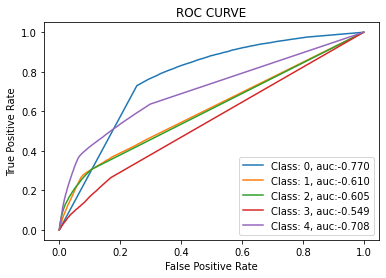

<Figure size 432x288 with 0 Axes>

In [8]:
# Efficientnet
with open('roc_pickle_files/efficientnet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x['preds'],x['labels'])

	class 0 auc -0.7395477747663661
	class 1 auc -0.5632079289946162
	class 2 auc -0.5513610280093214
	class 3 auc -0.5287210201844132
	class 4 auc -0.6842838069612185


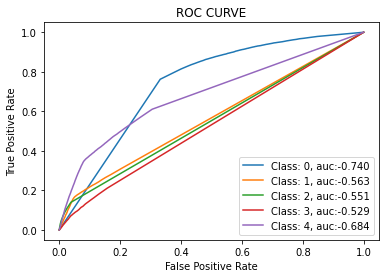

<Figure size 432x288 with 0 Axes>

In [9]:
# Mobilenet-V3
with open('roc_pickle_files/mobilenetv3.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x['preds'],x['labels'])

	class 0 auc -0.7822535299967234
	class 1 auc -0.615316758494983
	class 2 auc -0.6050519796265624
	class 3 auc -0.5265008461749352
	class 4 auc -0.7363861345100016


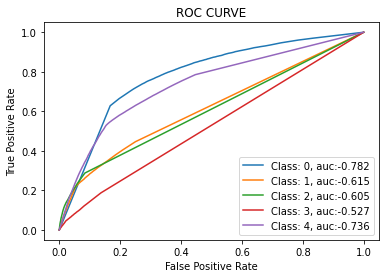

<Figure size 432x288 with 0 Axes>

In [10]:
# Shufflenet
with open('roc_pickle_files/shufflenet.pkl', 'rb') as f:
    x = pickle.load(f)
    ROC_plot(x['preds'],x['labels'])